In [6]:
import pandas as pd
import data.citylearn_challenge_2022_phase_1 as competition_data
import os.path as osp
import xgboost as xgb
from matplotlib import pyplot as plt


load_path = osp.join(osp.dirname(competition_data.__file__), "load_data.csv")
df_load = pd.read_csv(load_path)

solar_path = osp.join(osp.dirname(competition_data.__file__), "solar_data.csv")
df_solar = pd.read_csv(solar_path)


In [7]:
df_load.head()

,month,day_type,hour,outdoor_dry_bulb,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,...,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h,carbon_intensity,non_shiftable_load,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h,non_shiftable_load_future
0,8.0,1.0,1.0,20.1,19.4,22.8,19.4,79.0,79.0,71.0,...,444.0,747.0,0.0,0.157319,0.851167,0.22,0.22,0.22,0.22,0.834600
1,8.0,1.0,2.0,19.7,21.1,22.2,19.4,78.0,73.0,73.0,...,592.0,291.0,0.0,0.154503,0.834600,0.22,0.22,0.22,0.22,0.838167
2,8.0,1.0,3.0,19.3,22.2,22.8,19.4,78.0,71.0,71.0,...,491.0,153.0,0.0,0.150945,0.838167,0.22,0.22,0.22,0.22,1.478433
3,8.0,1.0,4.0,18.9,21.7,22.2,18.9,78.0,73.0,71.0,...,734.0,174.0,0.0,0.151820,1.478433,0.22,0.22,0.54,0.22,1.256200
4,8.0,1.0,5.0,18.3,22.2,21.1,18.3,81.0,71.0,76.0,...,811.0,396.0,0.0,0.158088,1.256200,0.22,0.22,0.54,0.22,1.869517


In [8]:
df_solar.head()

,month,day_type,hour,outdoor_dry_bulb,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,...,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h,carbon_intensity,solar_generation,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h,solar_generation_future
0,8.0,1.0,1.0,20.1,19.4,22.8,19.4,79.0,79.0,71.0,...,444.0,747.0,0.0,0.157319,0.0,0.22,0.22,0.22,0.22,0.000000
1,8.0,1.0,2.0,19.7,21.1,22.2,19.4,78.0,73.0,73.0,...,592.0,291.0,0.0,0.154503,0.0,0.22,0.22,0.22,0.22,0.000000
2,8.0,1.0,3.0,19.3,22.2,22.8,19.4,78.0,71.0,71.0,...,491.0,153.0,0.0,0.150945,0.0,0.22,0.22,0.22,0.22,0.000000
3,8.0,1.0,4.0,18.9,21.7,22.2,18.9,78.0,73.0,71.0,...,734.0,174.0,0.0,0.151820,0.0,0.22,0.22,0.54,0.22,0.000000
4,8.0,1.0,5.0,18.3,22.2,21.1,18.3,81.0,71.0,76.0,...,811.0,396.0,0.0,0.158088,0.0,0.22,0.22,0.54,0.22,0.058017


[13:50:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




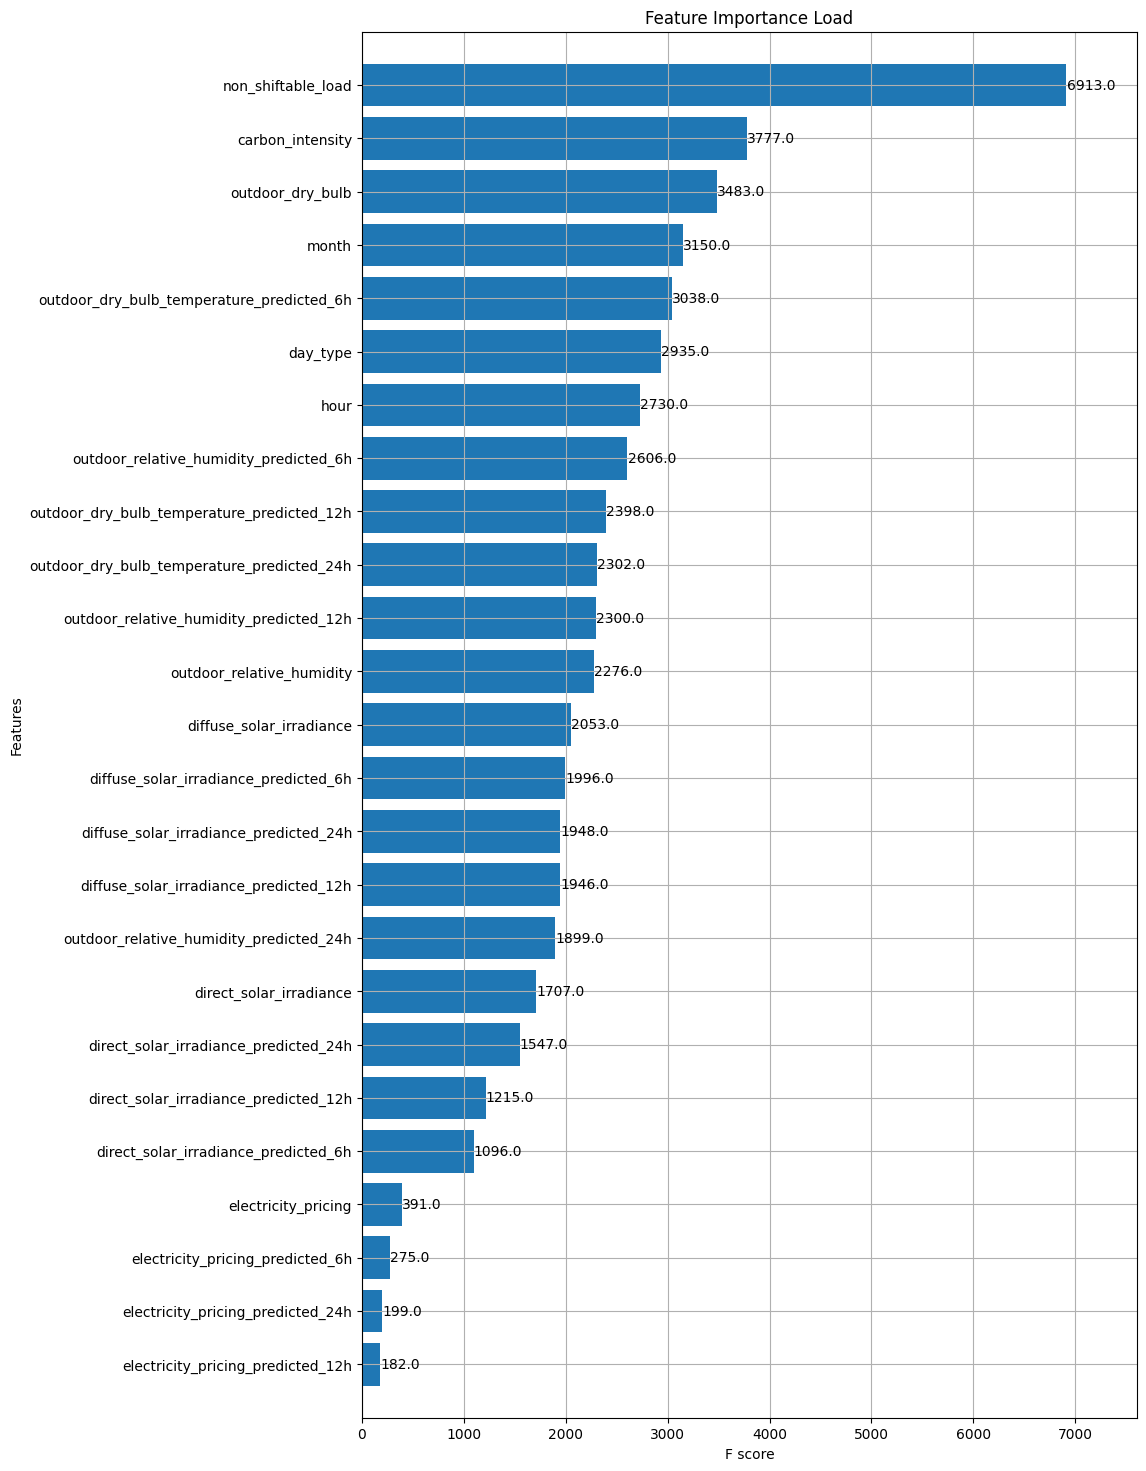

In [9]:
train_y = df_load["non_shiftable_load_future"]
train_X = df_load.drop(["non_shiftable_load_future"], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99


fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax, title="Feature Importance Load")
plt.show()

[13:51:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




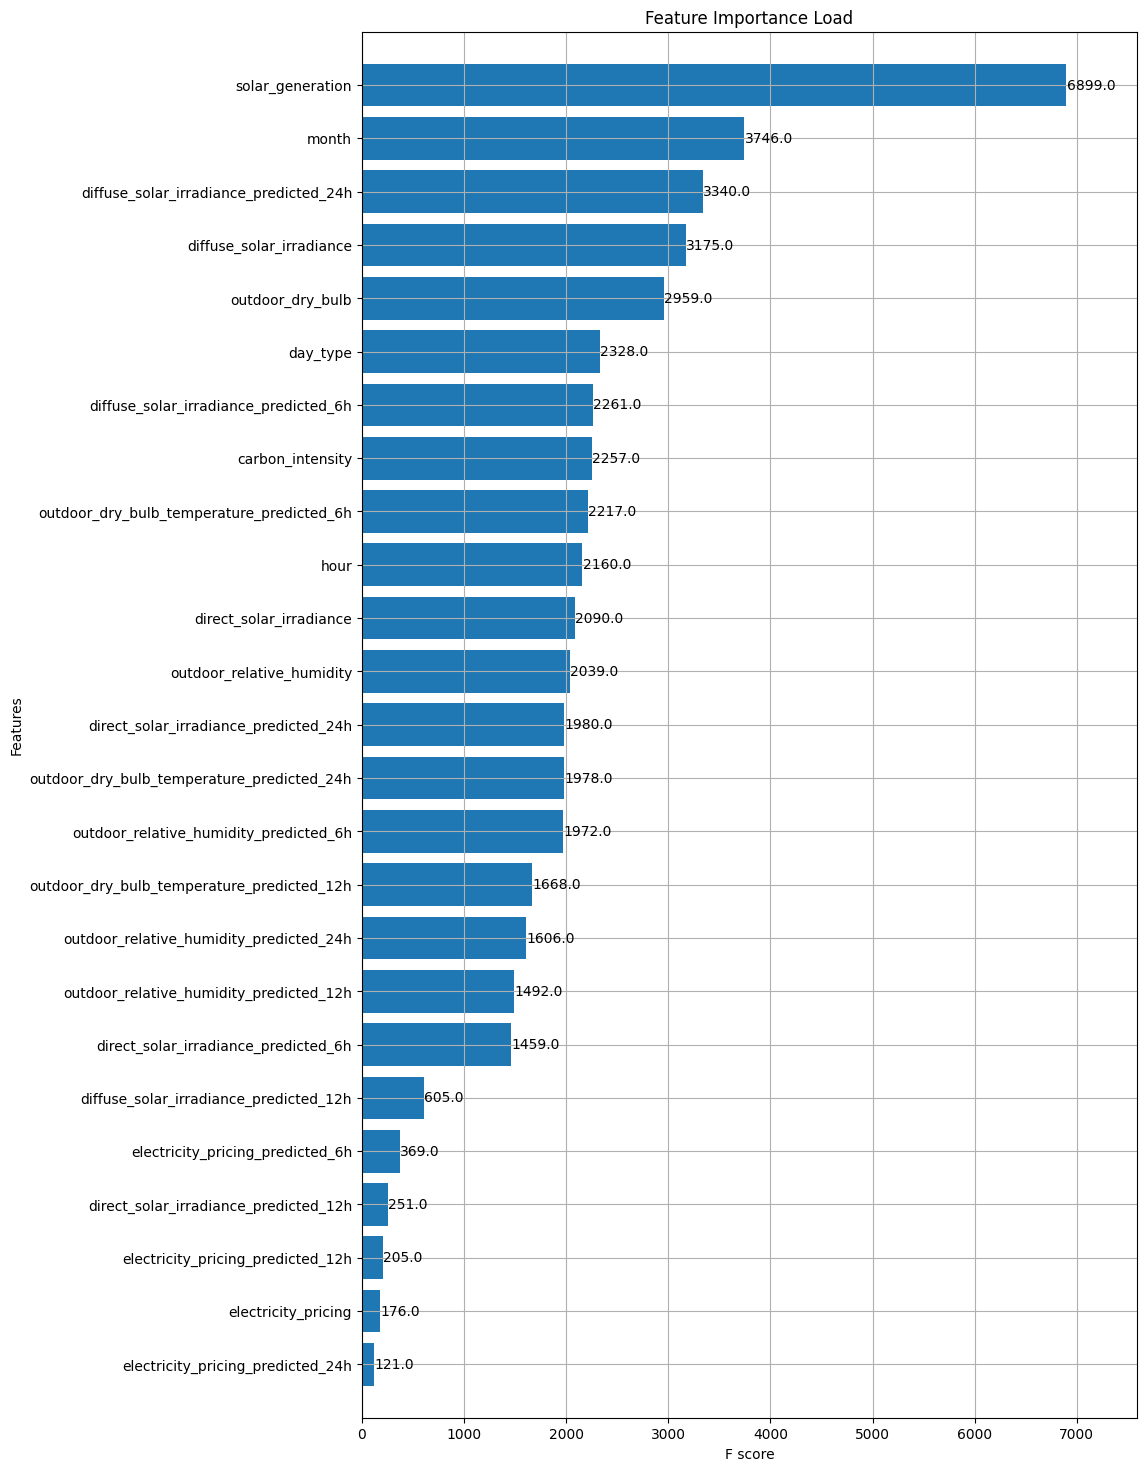

In [11]:
train_y = df_solar["solar_generation_future"]
train_X = df_solar.drop(["solar_generation_future"], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99


fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax, title="Feature Importance Load")
plt.show()